# Credit Risk Modeling

### What is credit risk?

A credit risk is the **risk of default** on a debt that may arise from a borrower failing to make required payments. In the first resort, the risk is that of the lender and includes lost principal and interest, disruption to cash flows, and increased collection costs. The loss may be complete or partial. In an efficient market, higher levels of credit risk will be associated with higher borrowing costs.

Losses can arise in a number of circumstances. For example:

- A consumer may fail to make a payment due on a mortgage loan, credit card, line of credit, or other loan.
- A company is unable to repay asset-secured fixed or floating charge debt.
- A business or consumer does not pay a trade invoice when due.
- A business does not pay an employee's earned wages when due.
- A business or government bond issuer does not make a payment on a coupon or principal payment when due.
- An insolvent insurance company does not pay a policy obligation.
- An insolvent bank won't return funds to a depositor.
- A government grants bankruptcy protection to an insolvent consumer or business.

To reduce the lender's credit risk:

- the lender may perform a credit check on the prospective borrower
- may require the borrower to take out appropriate insurance, such as mortgage insurance, or 
- seek security over some assets of the borrower or a guarantee from a third party. 

The lender can also take out insurance against the risk or on-sell the debt to another company. In general, the higher the risk, the higher will be the interest rate that the debtor will be asked to pay on the debt. Credit risk mainly arises when borrowers are unable to pay due willingly or unwillingly.

Re-iterating credit risk:

- Credit risk refers to the risk that a borrower may not repay a loan and that the lender may lose the principal of the loan or the interest associated with it. (Eg: Failure to pay back mortgages, credit cards, personal loans, etc)

- Higher credit risk equates to higher borrowing costs.

For a lender(eg: bank), it is of paramount importance to assess credit risk of the borrower. 


source: [wikipedia](https://en.wikipedia.org/wiki/Credit_risk), [investopedia](http://www.investopedia.com/terms/c/creditrisk.asp), [Datacamp Course using R](https://www.datacamp.com/courses/introduction-to-credit-risk-modeling-in-r)

# Problem Statement

XYZ Bank wants to build a credit risk model for its personal loan division. XYZ has given personal loans before and has historical data about the customers and knows whether the loan defaulted or not. If the loan had defaulted, the amount defaulted was recorded.

It wants you to build a credit risk model for its bankers.

It will use it to determine whether to provide loan to applicants or not.

# Approach

A very typical approach is to estimate the following two metrics for every applicant:

`Probability of Default`: What is the probability that the applicant will default, if given the loan

`Loss Given Default`: If the applicant defaults on the loan, what will be loss incurred by the bank?

For the purpose of this model, Bank XYZ has asked you to ignore cash flows from interest and other costs incurred by the bank for processing and maintaining the loan and use only the data provided in the data. 

# Data

You are provided with the following data:

**train_creditRisk.csv**  
This is the historical data that the bank has provided. It has the following columns

`loan_amnt` : Amount of Loan provided to the applicant  
`int_rate`: Interest rate charged for the applicant  
`grade`:  Employment Grade of the applicant  
`emp_length`: Number of years the applicant has been employed  
`home_ownership`: Whether the applicant owns a house or not  
`annual_inc`:  Annual income of the applicant  
`age`: Age of the applicant  
`default` : Whether the applicant has defaulted or not (target variable)  
`default_amount`:  What was the loan amount that was defaulted (target variable)

**testFeatures_creditRisk.csv**  
This dataset has the features of the applicants that you need to score and provide *probability of default* and *loss given default* metrics. It has the same set of columns as the train dataset, except the `default` and `default_amount` columns.


**testLabels_creditRisk.csv**  
This has the target columns of the test dataset. Once the model has been finalized, the accuracy of the model is found out by comparing the predictions against the actual. 

# Loading the data

In [73]:
import numpy as np
import pandas as pd

In [2]:
#Load the training dataset
train = pd.read_csv("data/train_creditRisk.csv")

In [3]:
#View the first few rows of train
train.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,5750,NaN,D,1.0,OTHER,16000.0,27,0,0
1,7500,12.22,C,8.0,MORTGAGE,55000.0,27,1,4560
2,19000,11.99,B,4.0,RENT,47000.0,25,0,0
3,24000,9.91,B,3.0,MORTGAGE,50400.0,26,0,0
4,25000,10.62,B,8.0,MORTGAGE,156600.0,32,0,0


In [4]:
#View the columns of the train dataset
train.columns

Index(['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership',
       'annual_inc', 'age', 'default', 'default_amount'],
      dtype='object')

In [5]:
#View the data types of the train dataset
train.dtypes

loan_amnt           int64
int_rate          float64
grade              object
emp_length        float64
home_ownership     object
annual_inc        float64
age                 int64
default             int64
default_amount      int64
dtype: object

In [6]:
#View summary of train 
train.describe()

,loan_amnt,int_rate,emp_length,annual_inc,age,default,default_amount
count,21819.000000,19711.000000,21212.000000,2.181900e+04,21819.000000,21819.000000,21819.000000
mean,9633.113342,10.984877,6.176221,6.750112e+04,27.704753,0.408589,1983.881250
std,6324.932999,3.235739,6.680542,6.757626e+04,6.284862,0.491584,3217.155453
min,500.000000,5.420000,0.000000,4.000000e+03,20.000000,0.000000,0.000000
25%,5000.000000,7.900000,2.000000,4.000000e+04,23.000000,0.000000,0.000000
50%,8000.000000,10.990000,4.000000,5.700000e+04,26.000000,0.000000,0.000000
75%,12500.000000,13.470000,8.000000,8.000000e+04,30.000000,1.000000,3240.000000
max,35000.000000,23.220000,62.000000,6.000000e+06,144.000000,1.000000,25146.000000


# Data Pre-processing

We will do the following two data pre-processing before building our first set of models.

1. handle missing values  
2. handle categorical variables

#### Missing values

In [8]:
#Find if train has missing values.
# There is a isnull() function
train.isnull().head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [9]:
#The above is kinda hard to comprehend. 
#It tells if every single element is null or not
#What we want first is to find if a column has missing values or not
#let's find that first
train.isnull().any()

loan_amnt         False
int_rate           True
grade             False
emp_length         True
home_ownership    False
annual_inc        False
age               False
default           False
default_amount    False
dtype: bool

In [19]:
#One consideration we check here is the number of observations with missing 
#values for those columns that have missing values
#If a column has too many missing values, it might make sense 
#to drop the column.
#let's see how many missing values are present
train.isnull().sum()

loan_amnt         0
int_rate          0
grade             0
emp_length        0
home_ownership    0
annual_inc        0
age               0
default           0
default_amount    0
dtype: int64

In [10]:
#So, we see that two columns have missing values. : int_rate and emp_length
#Both the columns are numeric. 
#Let's replace missing values with the mean of the column

In [12]:
train.mean()

loan_amnt          9633.113342
int_rate             10.984877
emp_length            6.176221
annual_inc        67501.115503
age                  27.704753
default               0.408589
default_amount     1983.881250
dtype: float64

In [17]:
#there's a fillna function
train = train.fillna(train.mean())

In [18]:
#Now, let's check if train has missing values or not
train.isnull().any()

loan_amnt         False
int_rate          False
grade             False
emp_length        False
home_ownership    False
annual_inc        False
age               False
default           False
default_amount    False
dtype: bool

#### Categorical variables

In [20]:
#We will use sklearn's LabelEncoder function

from sklearn.preprocessing import LabelEncoder

In [ ]:
#Replace grade and home_ownership with the labelEncoder

In [25]:
train[["grade", "home_ownership"]] =  train[["grade", "home_ownership"]].apply(LabelEncoder().fit_transform)

In [26]:
#Look at train to check if it worked fine
train.head()

,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age,default,default_amount
0,5750,10.984877,3,1.0,1,16000.0,27,0,0
1,7500,12.220000,2,8.0,0,55000.0,27,1,4560
2,19000,11.990000,1,4.0,3,47000.0,25,0,0
3,24000,9.910000,1,3.0,0,50400.0,26,0,0
4,25000,10.620000,1,8.0,0,156600.0,32,0,0


In [27]:
#check at the types
train.dtypes

loan_amnt           int64
int_rate          float64
grade               int64
emp_length        float64
home_ownership      int64
annual_inc        float64
age                 int64
default             int64
default_amount      int64
dtype: object

In [29]:
#We are good to build our first model
#But before that, let's do some exploratory data analysis

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

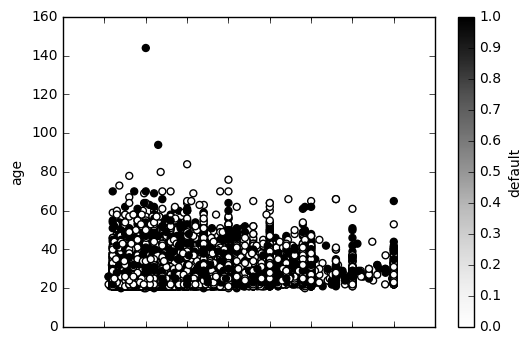

In [33]:
#Let's do scatter plot of loan amount, age and default. What do you infer?
train.plot.scatter(x="loan_amnt", y="age", c="default", s=25)

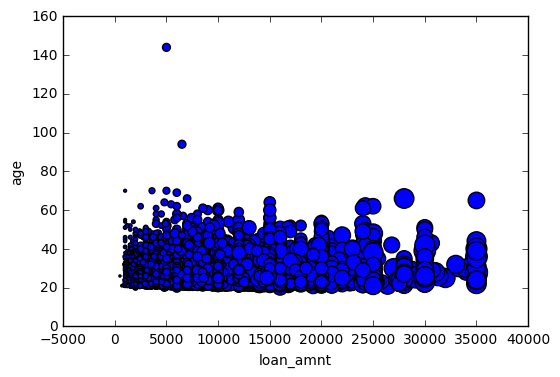

In [39]:
#How about doing the same for default amount.What do you infer?
train.plot.scatter(x="loan_amnt", y="age", s=train["default_amount"]*0.01)

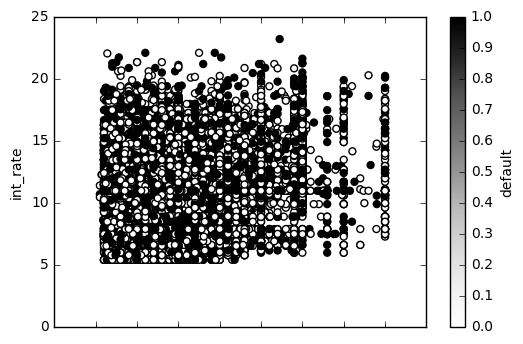

In [43]:
#Let's do scatter plot of loan amount, int_rate and default.What do you infer?
train.plot.scatter(x="loan_amnt", y="int_rate", c="default", s=25)

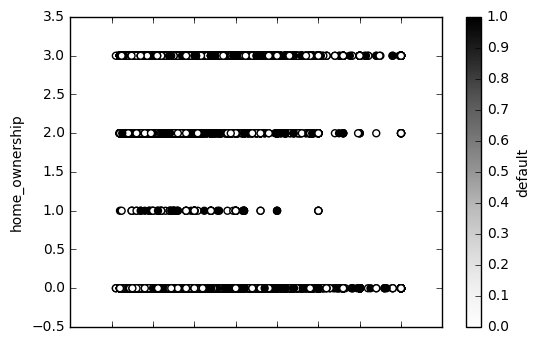

In [44]:
#Let's do scatter plot of loan amount, home ownership and default.What do you infer?
train.plot.scatter(x="loan_amnt", y="home_ownership", c="default", s=25)

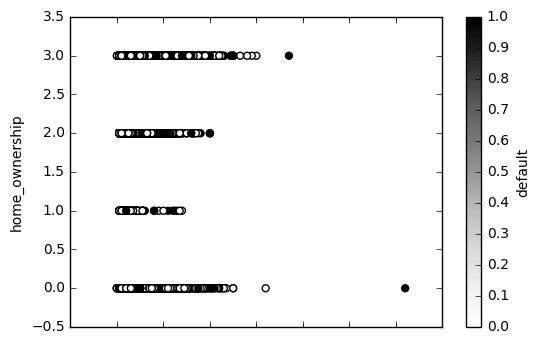

In [45]:
#Let's do scatter plot of age, home ownership and default.What do you infer?
train.plot.scatter(x="age", y="home_ownership", c="default", s=25)

In [46]:
#Feature engineering will help. We will cover this later.
#For now, let's use the given dataset and create our first set of models

# Task 1: `Probability of Default`

# First model: Benchmark

In [47]:
#Analyze the proportion of defaults in the training dataset
train.default.value_counts()

0    12904
1     8915
Name: default, dtype: int64

In [54]:
#Proportion of defaults:
print("Percentage of defaults in the training dataset:") 
train.default.value_counts()[1]/train.shape[0]*100

Percentage of defaults in the training dataset:


40.858884458499475

In [55]:
#What is the benchmark model? 

**Predict everything to be NOT DEFAULT**

In [57]:
#What's the accuracy of the benchmark model?
print("Benchmark accuracy:")
100 - train.default.value_counts()[1]/train.shape[0]*100

Benchmark accuracy:


59.141115541500525

In [58]:
#Let's see if we can build something better than this

# Second Model: Linear Regression (OLS)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
#instantiate the model
model2 = LinearRegression()

In [62]:
#fit the model
model2.fit(train.iloc[:,:7], train.iloc[:,7])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
#View parameters of the model
model2.coef_

array([ -1.44334077e-06,  -4.86706232e-04,   3.05854839e-02,
         7.01991846e-05,   1.23327608e-03,  -6.78294506e-08,
        -5.44417350e-05])

In [66]:
model2.intercept_

0.39444561636961972

**Exercise**

In [67]:
#Can you now tell the equation of the model?


In [68]:
#The right thing is to score it on the test dataset and determine the accuracy.
#For now, let's cheat a bit and score on train dataset and evaluate accuracy
#We will verify on test once we get a handle on model training

In [75]:
#score on train
model2_prediction = model2.predict(train.iloc[:,:7])

In [76]:
np.min(model2_prediction), np.max(model2_prediction)

(0.028230187052582956, 0.56587686085400046)

In [77]:
#There are two challenges with linear regression
#The values are not bounded between 0 and 1. 
#Luckily for us, it is bounded.
#Second is that - the values we get aren't probability. 
#So, one way to score it is to set everything above a particular threshold to be 1
#An easy threshold is 0.5. Let's set everything above 0.5 to b 1 and others to 0

In [79]:
#use 0.5 threshold to set prediction to 0 or 1
model2_prediction[model2_prediction>0.5] = 1
model2_prediction[model2_prediction <= 0.5] = 0

In [80]:
#What's the accuracy of the model?
#We will build the accuracy from scratch here. 
#Going forward we will use sklearn's in-built method

In [84]:
#accuracy of the model
predictions = pd.concat([pd.Series(model2_prediction), train.iloc[:,7]], axis=1)

In [86]:
predictions.columns = ["predicted", "actual"]

In [87]:
predictions.head()

,predicted,actual
0,0.0,0
1,0.0,1
2,0.0,0
3,0.0,0
4,0.0,0


In [89]:
#Find if prediction and actual are the same
predictions.predicted == predictions.actual

0         True
1        False
2         True
3         True
4         True
5         True
6        False
7        False
8        False
9        False
10        True
11       False
12        True
13        True
14       False
15       False
16        True
17        True
18        True
19       False
20       False
21        True
22       False
23        True
24       False
25       False
26       False
27       False
28       False
29        True
         ...  
21789     True
21790     True
21791    False
21792     True
21793     True
21794     True
21795     True
21796     True
21797     True
21798    False
21799     True
21800     True
21801     True
21802     True
21803    False
21804    False
21805     True
21806     True
21807    False
21808     True
21809    False
21810     True
21811    False
21812     True
21813    False
21814     True
21815     True
21816    False
21817     True
21818     True
dtype: bool

In [90]:
#Find the count of occurences where prediction and actual are same
np.sum(predictions.predicted == predictions.actual)

12895

In [92]:
#Divide the above metric by the total rows
print("Accuracy from Linear Regression Model:")
np.sum(predictions.predicted == predictions.actual)/predictions.shape[0]*100

Accuracy from Linear Regression Model:


59.099867088317524

In [93]:
#Doesn't look like it was any better than the benchmark !

# Model 3: Linear Regression (some refinement)

let's now play with some parameters on the linear regression model and check if model shows any improvement

In [94]:
# One obvious thing to do is the normalize the columns
# Discuss why !

In [95]:
model3 = LinearRegression(normalize=True)

In [97]:
model3.fit(train.iloc[:,:7], train.iloc[:,7])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [98]:
model3_prediction = model3.predict(train.iloc[:,:7])

In [112]:
#For predicted, set everything above 0.5 to 1 and rest to 0
model3_prediction[model3_prediction>0.5] = 1
model3_prediction[model3_prediction<=0.5] = 0

In [113]:
predictions = pd.DataFrame({"predicted":model3_prediction, 
                            "actual":train.iloc[:,7]})

In [114]:
predictions.head()

,actual,predicted
0,0,0.0
1,1,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [115]:
#Let's use accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(predictions.actual, predictions.predicted)

0.59099867088317526

In [120]:
#Again - no improvements over the benchmark

In [121]:
#Let's now try logistic regression

# Model 4: Logistic Regresion (Default:L2)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model4 = LogisticRegression()

In [124]:
model4.fit(train.iloc[:,:7], train.iloc[:,7])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [125]:
#Predict on train
model4_prediction = model4.predict(train.iloc[:,:7]) 

In [129]:
#Do we need to do threshold here? Discuss/prove why we need or why we don't need

In [130]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model4_prediction})

In [131]:
predictions.head()

,actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [132]:
accuracy_score(predictions.actual, predictions.predicted)

0.59141115541500522

In [133]:
#Still no improvement !

#  Model 5: Logistic Regression (L1)

In [134]:
model5 = LogisticRegression(penalty="l1")

In [135]:
model5.fit(train.iloc[:,:7], train.iloc[:,7])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
#predict on train
model5_prediction = model5.predict(train.iloc[:,:7])

In [138]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model5_prediction})

In [139]:
predictions.head()

,actual,predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [140]:
accuracy_score(predictions.actual, predictions.predicted)

0.59095283926852749

# Other accuracy metrics

So far, we have seen accuracy score. Now, let's check for other metrics

- auc
- precision
- recall
- F-score

In [145]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

In [148]:
precision_score(predictions.actual, predictions.predicted)

0.48239436619718312

In [149]:
recall_score(predictions.actual, predictions.predicted)

0.015367358384744812

In [150]:
f1_score(predictions.actual, predictions.predicted)

0.029785846287639962

In [151]:
#To compute auc, we need probability
model5_prob_prediction = model5.predict_proba(train.iloc[:,:7])

In [157]:
predictions = pd.DataFrame({"actual":train.iloc[:,7],
                           "predicted":model5_prob_prediction[:,1]})

In [158]:
roc_auc_score(predictions.actual, predictions.predicted)

0.54163808219740128